### Generate Dataset using normal-distribution

In [3]:
# Base Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [4]:
N, D, H, K = 500, 2, 3, 3

In [5]:
X1 = np.random.randn(N, D) + np.array([0, -2])
X2 = np.random.randn(N, D) + np.array([2, 2])
X3 = np.random.randn(N, D) + np.array([-2, 2])

In [6]:
X = np.vstack((X1, X2, X3))

In [7]:
X.shape

(1500, 2)

In [8]:
Y = np.array([0]*500+[1]*500+[2]*500)

In [9]:
Y.shape

(1500,)

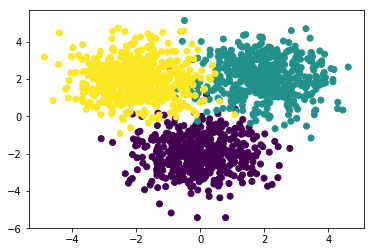

In [10]:
plt.scatter(X[:,0], X[:,1],  c=Y)

In [11]:
W1 = np.random.randn(D, H)
b1 = np.zeros(shape=(1, H))

W2 = np.random.randn(H, K)
b2 = np.zeros(shape=(1, K))

In [12]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [13]:
def sigmoid(A):
    return 1.0 / (1.0 + np.exp(-A))

In [14]:
def errorRate(Y, Yp):
    return np.mean(Y != Yp)

In [15]:
def accuracy(Y, Yp):
    return 1.0 - errorRate(Y, Yp)

In [16]:
accuracy(Y, np.argmax(Yp, axis=1))

NameError: name 'Yp' is not defined

### e-Commerce Dataset Prediction

In [17]:
def getData():
    df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv', header=None, skiprows=1)

    # just in case you're curious what's in it
    # df.head()

    # easier to work with numpy array
    data = df.values

    # shuffle it
    np.random.shuffle(data)

    # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)

    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest

In [52]:
Xtrain, Ytrain, Xtest, Ytest = getData()

In [53]:
Ytrain

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 3, 1, 0, 3, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 1, 0, 1,
       0, 0, 2, 3, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 1, 0, 3, 3, 0, 2, 0, 3, 0,
       0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1, 1,
       0, 0, 2, 2, 2, 3, 1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 0, 0, 3, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0,

In [54]:
D = Xtrain.shape[1]
K = len(set(Ytrain))
H = 5 # setting 5 hidden unit

W1 = np.random.randn(D, H)
b1 = np.zeros(shape=(1, H))

W2 = np.random.randn(H, K)
b2 = np.zeros(shape=(1, K))

print(D, K)

8 4


In [55]:
Yp = forward(Xtrain, W1, b1, W2, b2)

In [56]:
Yp

(array([[0.30877671, 0.28913842, 0.15053082, 0.25155405],
        [0.18410583, 0.38176821, 0.24172346, 0.19240249],
        [0.12930843, 0.32187823, 0.36881684, 0.17999649],
        ...,
        [0.06118855, 0.29244871, 0.50159736, 0.14476538],
        [0.14483149, 0.36199503, 0.30694709, 0.18622639],
        [0.06563091, 0.305871  , 0.48076555, 0.14773254]]),
 array([[0.31503363, 0.84211685, 0.79269109, 0.96837817, 0.16999791],
        [0.51025691, 0.23305483, 0.37011736, 0.62247746, 0.37975049],
        [0.34792589, 0.15030329, 0.31624696, 0.30910171, 0.83482023],
        ...,
        [0.97505794, 0.19600347, 0.17204638, 0.11507665, 0.97251835],
        [0.59835484, 0.19785955, 0.30027842, 0.49405445, 0.55810923],
        [0.9660274 , 0.2269192 , 0.21560692, 0.17170596, 0.94891405]]))

In [57]:
accuracy(Ytrain, np.argmax(Yp, axis=1))

ValueError: could not broadcast input array from shape (400,4) into shape (400)

In [58]:
np.argmax(Yp, axis=1)

ValueError: could not broadcast input array from shape (400,4) into shape (400)

In [59]:
def S(A):
    return 1.0 / (1.0 + np.exp(-A))

def Sp(A):
    return S(A) * (1-S(A))

In [60]:
x = np.arange(0, 50)

In [61]:
X = S(x)
Y = Sp(x)

X

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [62]:
Y

array([2.50000000e-01, 1.96611933e-01, 1.04993585e-01, 4.51766597e-02,
       1.76627062e-02, 6.64805667e-03, 2.46650929e-03, 9.10221180e-04,
       3.35237671e-04, 1.23379350e-04, 4.53958077e-05, 1.67011429e-05,
       6.14413685e-06, 2.26031919e-06, 8.31527336e-07, 3.05902133e-07,
       1.12535149e-07, 4.13993739e-08, 1.52299793e-08, 5.60279642e-09,
       2.06115369e-09, 7.58256124e-10, 2.78946866e-10, 1.02618802e-10,
       3.77513576e-11, 1.38880019e-11, 5.10902431e-12, 1.87960758e-12,
       6.91446900e-13, 2.54463117e-13, 9.34807787e-14, 3.44169138e-14,
       1.26565425e-14, 4.66293670e-15, 1.77635684e-15, 6.66133815e-16,
       2.22044605e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

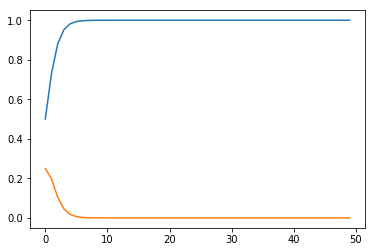

In [63]:
plt.plot(x, S(x))
plt.plot(x, Sp(x))

In [64]:
def oneZeroEncoding(y):
    N = len(y)
    K = len(set(y))
    
    index = np.zeros(shape=(N, K), dtype=int)
    
    for i, value in enumerate(y):
        index[i, value] = 1
        
    return index

In [65]:
def cost(Y, Yp):
    return -(Y * np.log(Yp)).sum()

In [66]:
def forward(X, W1, b1, W2, b2):
    a1 = (X@W1) + b1
    z1 = sigmoid(a1)
    
    a2 = (z1@W2) + b2
    Yp = softmax(a2)
    
    return Yp, z1

In [67]:
def dW2(Z, T, Y):
    return Z.T.dot(Y - T)

def dW1(X, Z, T, Y, W2):
    dZ = (Y - T).dot(W2.T) * (Z * (1 - Z))
    return X.T.dot(dZ)

def db2(T, Y):
    return (Y - T).sum(axis=0)

def db1(T, Y, W2, Z):
    return ((Y - T).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [68]:
N, D, H, K = 500, 2, 3, 3

X1 = np.random.randn(N, D) + np.array([0, -2])
X2 = np.random.randn(N, D) + np.array([2, 2])
X3 = np.random.randn(N, D) + np.array([-2, 2])

X = np.vstack((X1, X2, X3))
Y = np.array([0]*500+[1]*500+[2]*500)

In [69]:
X, Y = shuffle(X, Y)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=0)

In [70]:
class ANN:
    def __init__(self, H):
        self.H = H
        
    def fit(self, X, Y, lr=1e-5, epoch=1000):
        N, D = X.shape
        K = len(set(Y))
        
        self.X = X
        self.Y = oneZeroEncoding(Y)
        
        self.W1 = np.random.randn(D, self.H)
        self.b1 = np.zeros(shape=(1, self.H))
        
        self.W2 = np.random.randn(self.H, K)
        self.b2 = np.zeros(shape=(1, K))
        
        costs = []
        for epoch in range(epoch):
            Yp, Z1 = self.forward()
            
            
            if epoch%100==0:
                c = cost(self.Y, Yp)
                acc = accuracy(np.argmax(self.Y, axis=1), np.argmax(Yp, axis=1))
                costs.append(c)
                print('Epoch:{}, Cost: {}, Accuracy: {}'.format(epoch, c, acc))
            #end-if
            
            self.W2 -= lr * (Z1.T @ (Yp - self.Y))
            self.b2 -= lr * (Yp - self.Y).sum(axis=0)
            
            self.W1 -= lr * ( X.T @ (((Yp - self.Y) @ self.W2) * Z1 * (1-Z1)) )
            self.b1 -= lr * (((Yp - self.Y) @ self.W2) * Z1 * (1-Z1)).sum(axis=0)
        
        # Drawing the Cost Plot
        plt.plot(costs)
        plt.show()

    def forward(self,):
        a1 = (self.X@self.W1) + self.b1
        Z1 = sigmoid(a1)
        
        a2 = (Z1@self.W2) + self.b2
        Yp = softmax(a2) # z2 = Yp
        
        return Yp, Z1
        
    def predict(self, X, Y):
        Yp, _ = self.forward()
        return accuracy(np.argmax(self.Y, axis=1), np.argmax(Yp, axis=1))
    

Epoch:0, Cost: 1498.683956209411, Accuracy: 0.13233830845771144
Epoch:100, Cost: 102.99363462985573, Accuracy: 0.9741293532338309
Epoch:200, Cost: 80.62620935105969, Accuracy: 0.973134328358209
Epoch:300, Cost: 74.94206827149976, Accuracy: 0.9741293532338309
Epoch:400, Cost: 72.30053047619982, Accuracy: 0.9751243781094527
Epoch:500, Cost: 70.76521728801984, Accuracy: 0.9761194029850746
Epoch:600, Cost: 69.75613736382755, Accuracy: 0.9761194029850746
Epoch:700, Cost: 69.03741426973697, Accuracy: 0.9761194029850746
Epoch:800, Cost: 68.49610119378407, Accuracy: 0.9771144278606965
Epoch:900, Cost: 68.0715822908277, Accuracy: 0.9771144278606965
Epoch:1000, Cost: 67.72826661860279, Accuracy: 0.9771144278606965
Epoch:1100, Cost: 67.4437186606851, Accuracy: 0.9761194029850746
Epoch:1200, Cost: 67.20300997065584, Accuracy: 0.9761194029850746
Epoch:1300, Cost: 66.99580456790638, Accuracy: 0.9751243781094527
Epoch:1400, Cost: 66.81473686440424, Accuracy: 0.9761194029850746
Epoch:1500, Cost: 66.65

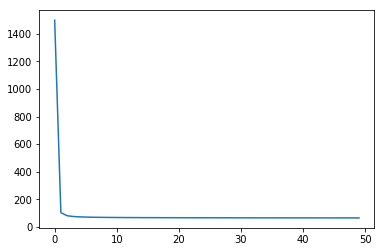

In [71]:
model = ANN(H=3) #hidder layer's unit is 3.
model.fit(Xtrain, Ytrain, lr=1e-3, epoch=5000)

In [72]:
model.predict(Xtest, Ytest)

0.9771144278606965

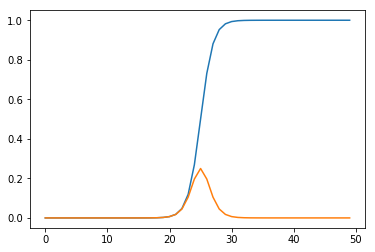

In [38]:
x = np.arange(-25, 25)
plt.plot(sigmoid(x))
plt.plot(sigmoid(x)*(1-sigmoid(x)))

In [39]:
def k(x):
    return x**2.0 - 6*x + 117

In [40]:
# x = 10
# for epoch in range(500):
#     seeking = k(x) # forward()
#     print(seeking)
    
#     dx = 2*x-6
#     x = x - 0.01*dx
    
# print(x)
# print(k(x))

In [47]:
for i in range(3, 0, -1):
    print(i)

3
2
1
